# Summary
- \sigma(x)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

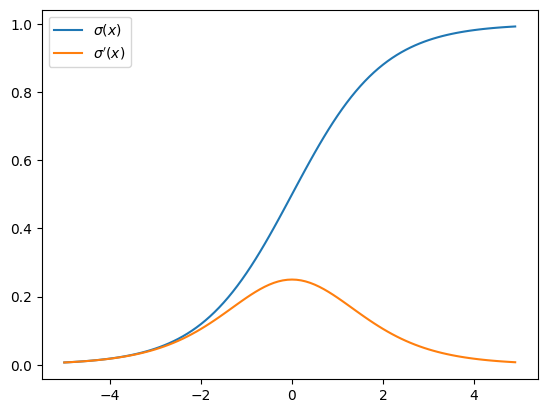

In [4]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, sigmoid(x))
plt.plot(x, sigmoid_prime(x))
plt.legend(['$\sigma(x)$', "$\sigma'(x)$"])

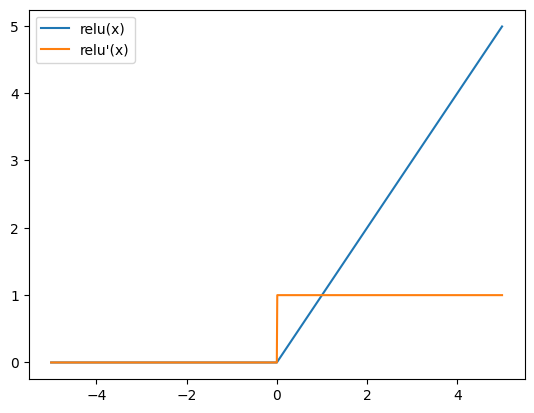

In [6]:

x = np.arange(-5, 5, 0.01)


def relu(x):
    return np.where(x > 0, x, 0)


def relu_prime(x):
    return np.where(x > 0, 1, 0)


plt.plot(x, relu(x))
plt.plot(x, relu_prime(x))
plt.legend(['relu(x)', "relu'(x)"])


relu(x)会部分地改善梯度消失问题
- 会诱导sparse representation
- dying relu / dead neuron

In [7]:
import torch
from torch import nn

In [8]:
x = torch.normal(0, 1, (3, 5))
w = nn.Linear(5, 4)
w(x)

tensor([[-0.5572,  0.1719, -0.8554,  0.3663],
        [-1.1153, -1.0401, -0.8633,  0.8527],
        [-1.2119, -0.7404, -1.0215,  0.3327]], grad_fn=<AddmmBackward0>)

In [9]:
torch.relu(w(x))

tensor([[0.0000, 0.1719, 0.0000, 0.3663],
        [0.0000, 0.0000, 0.0000, 0.8527],
        [0.0000, 0.0000, 0.0000, 0.3327]], grad_fn=<ReluBackward0>)

#### dying relu or dead neuron

https://liam.page/2018/11/30/vanishing-gradient-of-ReLU-due-to-unusual-input/

Feeding values that are outside the usual range of features can cause large gradients to back propagate. This can permanently shut of activation functions
like ReLU due to vanishing gradients.



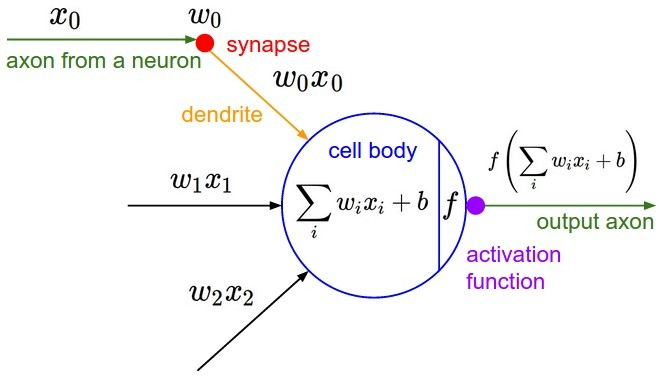

In [12]:
from IPython.display import Image

Image("./imgs/cell.jpg")


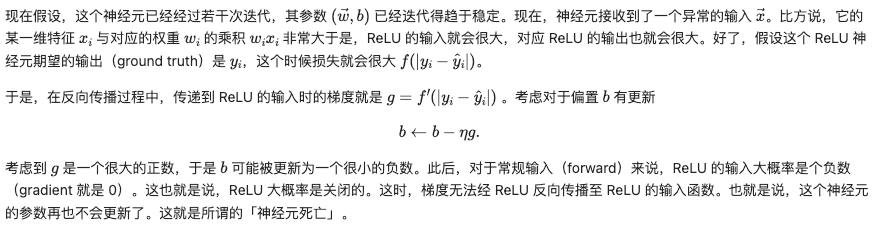

In [13]:
Image("./imgs/img.png")

### torch.clamp

In [14]:
x = torch.normal(0, 1, (3, 4), requires_grad=True)
y = torch.clamp(x, -0.3, 0.3)
y.sum().backward()

In [15]:
x

tensor([[-1.2571, -1.2475, -0.5436, -0.8078],
        [-0.8776, -1.3876, -1.1312,  0.3955],
        [ 1.0979, -0.4518,  0.0556,  1.2331]], requires_grad=True)

In [16]:
y

tensor([[-0.3000, -0.3000, -0.3000, -0.3000],
        [-0.3000, -0.3000, -0.3000,  0.3000],
        [ 0.3000, -0.3000,  0.0556,  0.3000]], grad_fn=<ClampBackward1>)

In [17]:
x.grad

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.]])